In [17]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys


In [18]:
sys.path.append("../..")
sys.path.append("..")

from analysis.multi_plot_utils import multi_disp_learn_hist, multi_compute_roc, multi_plot_roc
from analysis.comparison_utils import multi_get_masked_data, multi_collapse_test_output

from test_utils import load_test_output_pn


In [19]:
%load_ext autoreload
%matplotlib inline
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
############# define plotting params #############
c = plt.rcParams['axes.prop_cycle'].by_key()['color']
label_dict = {"$\gamma$":0, "$e$":1, "$\mu$":2}
inverse_label_dict = {0:"$\gamma$", 1:"$e$", 2:"$\mu$"}

In [21]:
############# define run locations #############
mp_locs = ['/home/jtindall/multiprocessing_framework_replication/multiprocessing_framework_single_gpu/mp_single_gpu_run_1/outputs',
           '/home/jtindall/multiprocessing_framework_replication/multiprocessing_framework_single_gpu/mp_single_gpu_run_2/outputs',
           '/home/jtindall/multiprocessing_framework_replication/multiprocessing_framework_single_gpu/mp_single_gpu_run_3/outputs',
           '/home/jtindall/multiprocessing_framework_replication/multiprocessing_framework_single_gpu/mp_single_gpu_run_4/outputs',
           '/home/jtindall/multiprocessing_framework_replication/multiprocessing_framework_single_gpu/mp_single_gpu_run_5/outputs',
           '/home/jtindall/multiprocessing_framework_replication/multiprocessing_framework_single_gpu/mp_single_gpu_run_6/outputs'
       ]

mp_titles = ['MP Framework Single GPU Run 1',
             'MP Framework Single GPU Run 2',
             'MP Framework Single GPU Run 3',
             'MP Framework Single GPU Run 4',
             'MP Framework Single GPU Run 5',
             'MP Framework Single GPU Run 6'
        ]

new_locs = ['/home/jtindall/new_framework_replication/new_frame_single_gpu_replication/1_gpu_run_1/outputs',
            '/home/jtindall/new_framework_replication/new_frame_single_gpu_replication/1_gpu_run_2/outputs',
            '/home/jtindall/new_framework_replication/new_frame_single_gpu_replication/1_gpu_run_3/outputs',
            '/home/jtindall/new_framework_replication/new_frame_single_gpu_replication/1_gpu_run_4/outputs',
            '/home/jtindall/new_framework_replication/new_frame_single_gpu_replication/1_gpu_run_5/outputs',
            '/home/jtindall/new_framework_replication/new_frame_single_gpu_replication/1_gpu_run_6/outputs',
            '/home/jtindall/new_framework_replication/new_frame_single_gpu_replication/1_gpu_run_7/outputs',
            '/home/jtindall/new_framework_replication/new_frame_single_gpu_replication/1_gpu_run_8/outputs',
            '/home/jtindall/new_framework_replication/new_frame_single_gpu_replication/1_gpu_run_9/outputs',
            '/home/jtindall/new_framework_replication/new_frame_single_gpu_replication/1_gpu_run_10/outputs'
           ]

new_titles = ['Pre-MP Framework Single GPU Run 1',
              'Pre-MP Framework Single GPU Run 2',
              'Pre-MP Framework Single GPU Run 3',
              'Pre-MP Framework Single GPU Run 4',
              'Pre-MP Framework Single GPU Run 5',
              'Pre-MP Framework Single GPU Run 6',
              'Pre-MP Framework Single GPU Run 7',
              'Pre-MP Framework Single GPU Run 8',
              'Pre-MP Framework Single GPU Run 9',
              'Pre-MP Framework Single GPU Run 10',
             ]

"""
new_linecolor = [c[0],c[1],c[2],c[3],c[4],c[5],c[6],c[7],c[8],c[9]]
new_linestyle = ['--','--','--','--','--','--','--','--','--','--']

old_linecolor = [c[0],c[1],c[2],c[3],c[4],c[5],c[6],c[7]]
old_linestyle = [':',':',':',':',':',':',':',':']
"""

mp_linecolor = [c[0] for _ in mp_locs]
mp_linestyle = ['--' for _ in mp_locs]

new_linecolor = [c[1] for _ in new_locs]
new_linestyle = [':' for _ in new_locs]

locs = mp_locs + new_locs
titles = mp_titles + new_titles
linecolor = mp_linecolor + new_linecolor
linestyle = mp_linestyle + new_linestyle


i:  0
Found training logs:  ['/home/jtindall/multiprocessing_framework_replication/multiprocessing_framework_single_gpu/mp_single_gpu_run_1/outputs/log_train_0.csv']
i:  1
Found training logs:  ['/home/jtindall/multiprocessing_framework_replication/multiprocessing_framework_single_gpu/mp_single_gpu_run_2/outputs/log_train_0.csv']
i:  2
Found training logs:  ['/home/jtindall/multiprocessing_framework_replication/multiprocessing_framework_single_gpu/mp_single_gpu_run_3/outputs/log_train_0.csv']
i:  3
Found training logs:  ['/home/jtindall/multiprocessing_framework_replication/multiprocessing_framework_single_gpu/mp_single_gpu_run_4/outputs/log_train_0.csv']
i:  4
Found training logs:  ['/home/jtindall/multiprocessing_framework_replication/multiprocessing_framework_single_gpu/mp_single_gpu_run_5/outputs/log_train_0.csv']
i:  5
Found training logs:  ['/home/jtindall/multiprocessing_framework_replication/multiprocessing_framework_single_gpu/mp_single_gpu_run_6/outputs/log_train_0.csv']


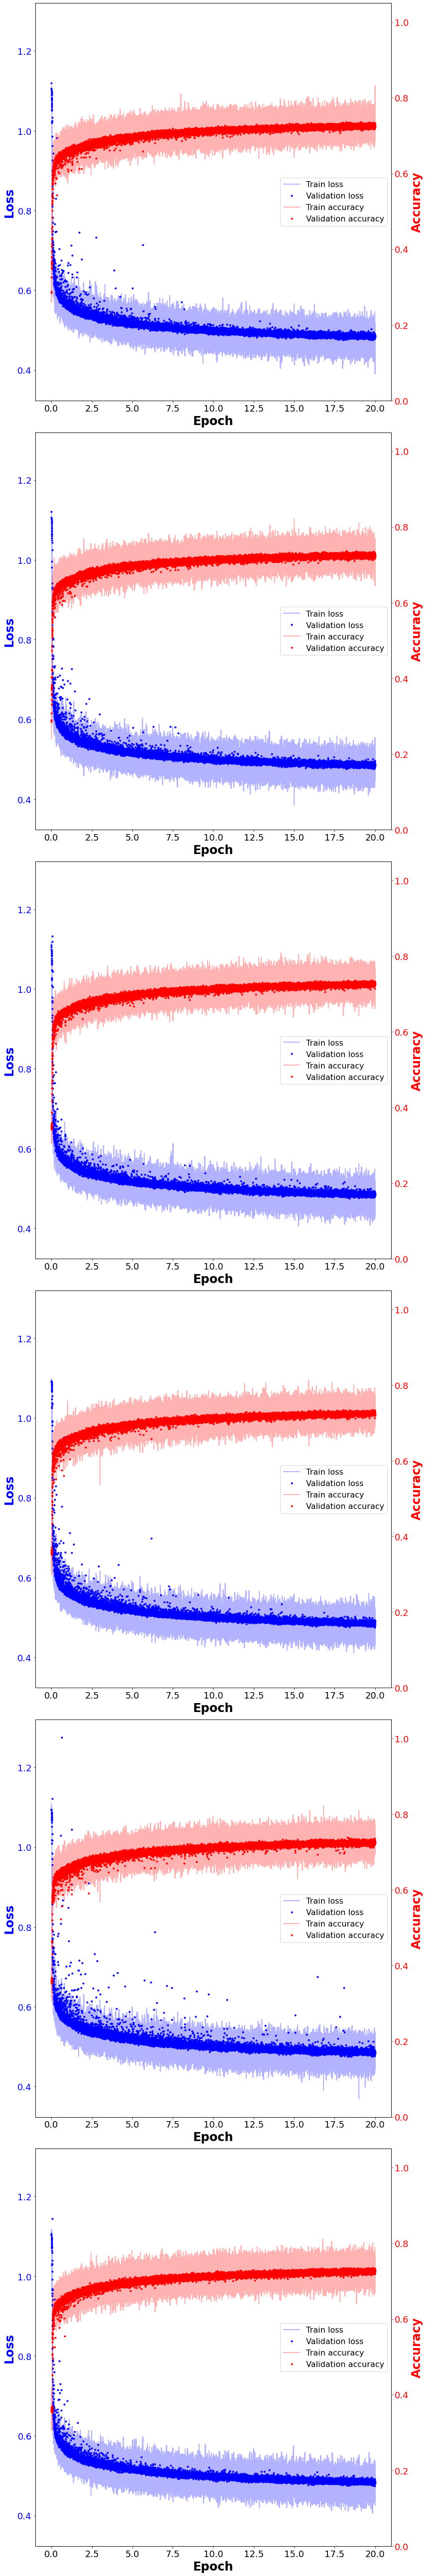

In [22]:
fig = multi_disp_learn_hist(mp_locs,losslim=2.5,titles=titles,leg_font=15, title_font=15,xmax=20)

In [23]:
############# load new run data #############
idx_file_path = '/fast_scratch/WatChMaL/data/IWCD_fulltank_300_post_veto_nomichel_pe_idxs.npz'
indices = np.load(idx_file_path)['test_idxs']

cut_path = '/home/jtindall/indices/pointnet_cut_indices.npz'

cuts_to_apply= ['fq_failed', 'fq_flag']

#mp_raw_predicted_labels = [np.load(loc + "/predictions.npy") for loc in mp_locs]
mp_raw_output_softmax   = [np.load(loc + "/softmax.npy") for loc in mp_locs]
mp_raw_actual_labels    = [np.load(loc + "/labels.npy") for loc in mp_locs]

In [24]:
############# load old run data #############

new_outputs = [load_test_output_pn(os.path.join(loc,'test_validation_iteration_dump.npz'),
                                   cut_path,
                                   np.load(idx_file_path)['test_idxs'], cut_list=[])
               for i, loc in enumerate(new_locs)]

new_raw_output_softmax   = [output["softmax"] for output in new_outputs]
new_raw_actual_labels    = [output["labels"] for output in new_outputs]
#new_raw_predicted_labels = [output["predictions"] for output in new_outputs]

data shape:  (2224824,)
test indices shape:  (2224824,)
data shape:  (2224824,)
test indices shape:  (2224824,)
data shape:  (2224824,)
test indices shape:  (2224824,)
data shape:  (2224824,)
test indices shape:  (2224824,)
data shape:  (2224824,)
test indices shape:  (2224824,)
data shape:  (2224824,)
test indices shape:  (2224824,)
data shape:  (2224824,)
test indices shape:  (2224824,)
data shape:  (2224824,)
test indices shape:  (2224824,)
data shape:  (2224824,)
test indices shape:  (2224824,)
data shape:  (2224824,)
test indices shape:  (2224824,)


In [25]:
############# combine run data #############
#raw_predicted_labels = mp_raw_predicted_labels + new_raw_predicted_labels
raw_output_softmax   = mp_raw_output_softmax + new_raw_output_softmax
raw_actual_labels    = mp_raw_actual_labels + new_raw_actual_labels

In [26]:
############# apply cuts to data #############
#predicted_labels = multi_get_masked_data(raw_predicted_labels, cut_path, indices, cuts_to_apply)
output_softmax   = multi_get_masked_data(raw_output_softmax, cut_path, indices, cuts_to_apply)
actual_labels    = multi_get_masked_data(raw_actual_labels, cut_path, indices, cuts_to_apply)

In [27]:
############# plot multi e/gamma ROC #############
fprs, tprs, thrs = multi_compute_roc(output_softmax, actual_labels, 
                                     true_label=label_dict["$e$"], 
                                     false_label=label_dict["$\gamma$"])

[<AxesSubplot:>]
[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs 

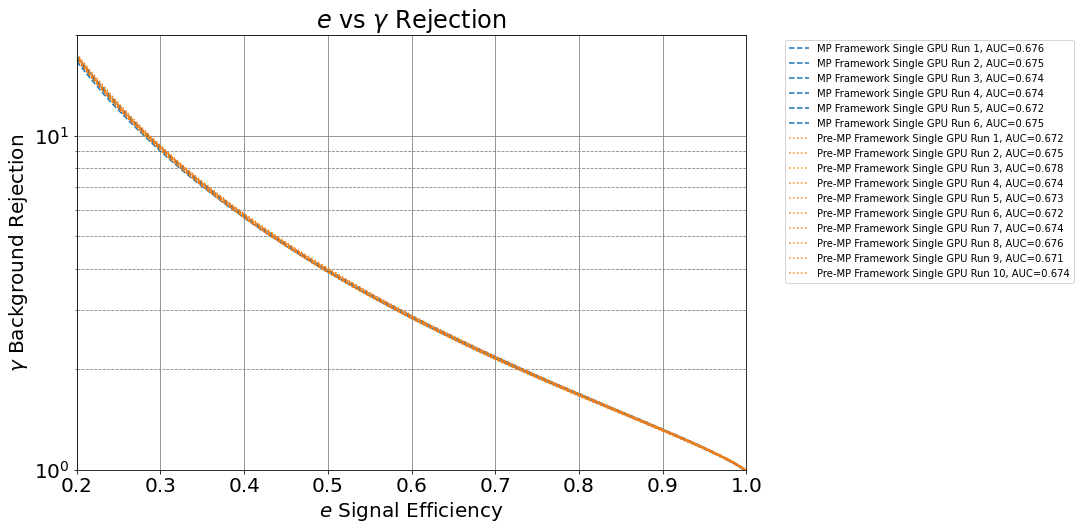

In [28]:
figs = multi_plot_roc(fprs, tprs, thrs, "$e$", "$\gamma$", 
                      fig_list=[1], xlims=[[0.2,1.0]],ylims=[[1e0,2e1]], 
                      linestyles=linestyle,linecolors=linecolor, 
                      plot_labels=titles, show=False)

In [29]:
############# plot multi e/mu ROC #############
fprs, tprs, thrs = multi_compute_roc(output_softmax, actual_labels, 
                                     true_label=label_dict["$e$"], 
                                     false_label=label_dict["$\mu$"])

[<AxesSubplot:>]
[<AxesSubplot:title={'center':'$e$ vs $\\mu$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\mu$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\mu$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\mu$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\mu$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\mu$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\mu$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\mu$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\mu$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\mu$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\mu$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\mu$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\mu$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\mu$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\mu$ Rejection'}, xlabel='$e$ Signal Eff

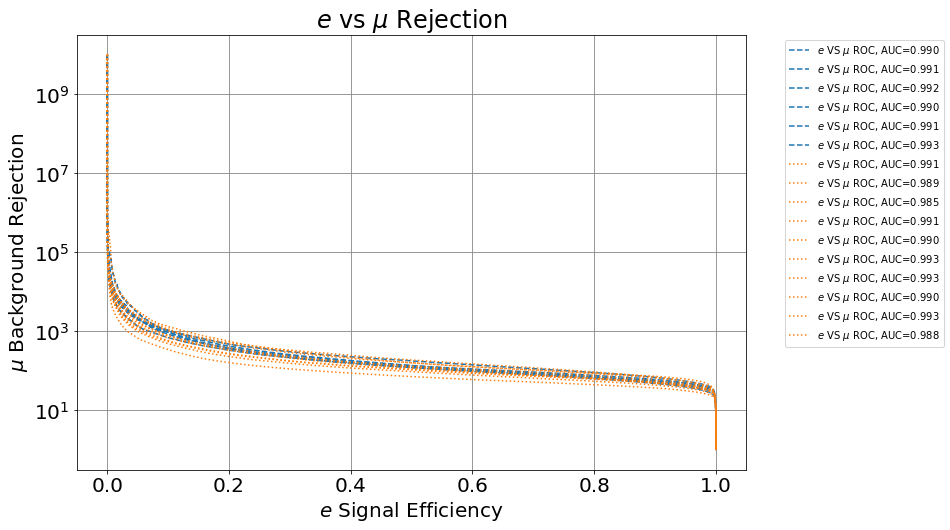

In [30]:
figs = multi_plot_roc(fprs, tprs, thrs, "$e$", "$\mu$", fig_list=[1], 
                      linestyles=linestyle,linecolors=linecolor, show=False)

In [31]:
############# plot collapsed ROC #############
"""
plot_list=["$e$", "$\gamma$"]
vs_list=["$\mu$"]
"""
collapsed_class_scores_list, collapsed_class_labels_list = multi_collapse_test_output(output_softmax, actual_labels, label_dict, ignore_type='$\gamma$')

collapsed_class_labels_list = [collapsed_class_labels - 1 for collapsed_class_labels in collapsed_class_labels_list]
collapsed_class_scores_list = [collapsed_class_scores[:,1:] for collapsed_class_scores in collapsed_class_scores_list]

[<AxesSubplot:>]
[<AxesSubplot:title={'center':'e/gamma vs mu Rejection'}, xlabel='e/gamma Signal Efficiency', ylabel='mu Background Rejection'>]
[<AxesSubplot:title={'center':'e/gamma vs mu Rejection'}, xlabel='e/gamma Signal Efficiency', ylabel='mu Background Rejection'>]
[<AxesSubplot:title={'center':'e/gamma vs mu Rejection'}, xlabel='e/gamma Signal Efficiency', ylabel='mu Background Rejection'>]
[<AxesSubplot:title={'center':'e/gamma vs mu Rejection'}, xlabel='e/gamma Signal Efficiency', ylabel='mu Background Rejection'>]
[<AxesSubplot:title={'center':'e/gamma vs mu Rejection'}, xlabel='e/gamma Signal Efficiency', ylabel='mu Background Rejection'>]
[<AxesSubplot:title={'center':'e/gamma vs mu Rejection'}, xlabel='e/gamma Signal Efficiency', ylabel='mu Background Rejection'>]
[<AxesSubplot:title={'center':'e/gamma vs mu Rejection'}, xlabel='e/gamma Signal Efficiency', ylabel='mu Background Rejection'>]
[<AxesSubplot:title={'center':'e/gamma vs mu Rejection'}, xlabel='e/gamma Signal

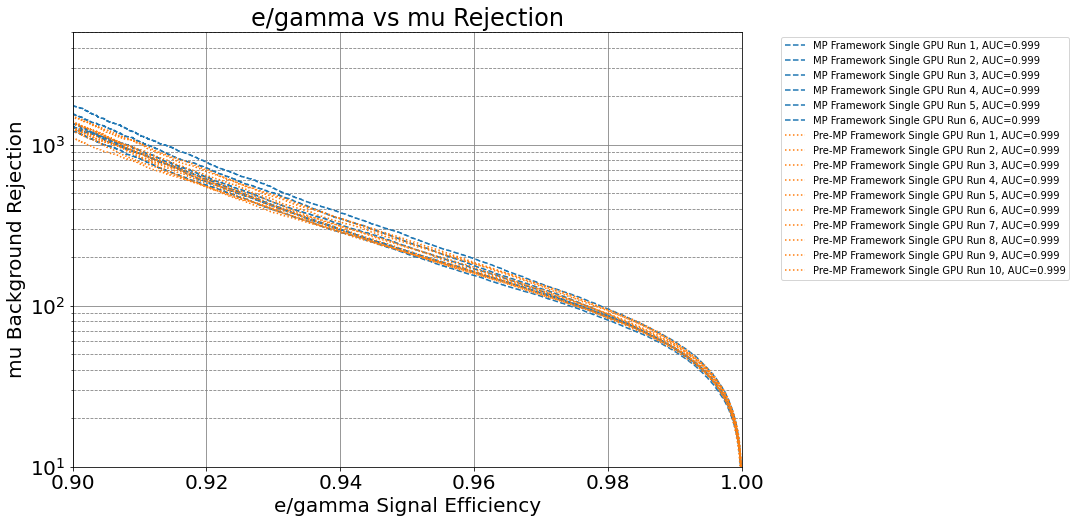

In [32]:
muon_softmax_index_dict = {"e/gamma":0, "mu":1}

fpr, tpr, thr = multi_compute_roc(collapsed_class_scores_list, collapsed_class_labels_list, 
                            true_label=muon_softmax_index_dict["e/gamma"], 
                            false_label=muon_softmax_index_dict["mu"])

figs = multi_plot_roc(fpr, tpr, thr,"e/gamma", "mu", 
                      fig_list=[1], xlims=[[0.9,1.0]],ylims=[[1e1,5e3]], 
                      linestyles=linestyle,linecolors=linecolor, plot_labels=titles, show=False)